In [363]:
import pandas as pd
import numpy as np
import os
import timeit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, roc_auc_score, f1_score, homogeneity_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture as EM
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as RCA
from collections import defaultdict
from itertools import product
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.ensemble import RandomForestClassifier as RFC

In [135]:
sns.set_theme(style="whitegrid")

In [45]:
#import dataset
datasets = os.listdir('../hw1/datasets')

In [49]:
data_dict = {}
for i in datasets:
    data_dict[i.split('.')[0]] = pd.read_csv(f'../hw1/datasets/{i}')

data preparation

In [ ]:
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(data_dict['X1_train'])
X1_test_scaled = scaler.transform(data_dict['X1_test'])
X2_train_scaled = scaler.fit_transform(data_dict['X2_train'])
X2_test_scaled = scaler.transform(data_dict['X2_test'])

In [118]:
y1_train = data_dict['y1_train'].iloc[:,0].values
y1_test = data_dict['y1_test'].iloc[:,0].values
y2_train = data_dict['y2_train'].iloc[:,0].values
y2_test = data_dict['y2_test'].iloc[:,0].values

Part 1 - Clustering (K-Means and EM)

In [384]:
def run_kmeans(X,y,title):

    km1 = KMeans(random_state=2021)

    visulizer1 = KElbowVisualizer(km1,k=(2,12), metric = 'silhouette')
    visulizer1.fit(X);
    visulizer1.finalize()
    plt.show()
    plt.close()

    visulizer1 = KElbowVisualizer(km1,k=(2,12))
    visulizer1.fit(X);
    visulizer1.finalize()
    plt.show()
    plt.close()

    kclusters = list(range(2,12))
    homo_scores = []; train_times = []

    for k in kclusters:
        start_time = timeit.default_timer()
        km = KMeans(n_clusters=k, n_init=10,random_state=2021).fit(X)
        end_time = timeit.default_timer()
        train_times.append(end_time - start_time)
        homo_scores.append(homogeneity_score(y, km.labels_))

    # elbow curve for silhouette score

    # plot homogeneity scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(kclusters, homo_scores,'-o')
    plt.grid(True)
    plt.xlabel('No. Clusters')
    plt.ylabel('Homogeneity Score')
    plt.title('Homogeneity Scores KMeans: '+ title)
    plt.show()
    return train_times

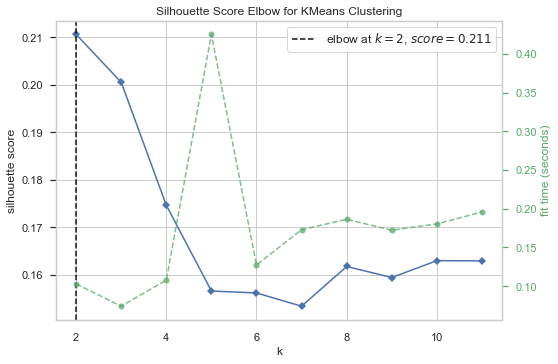

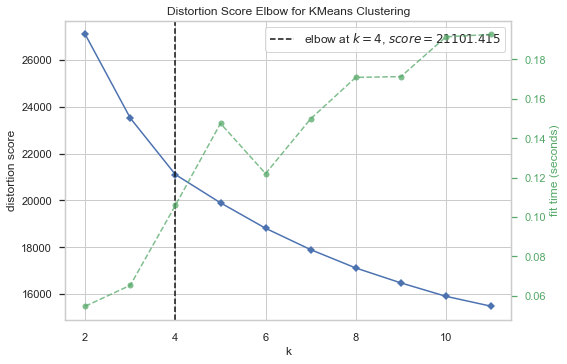

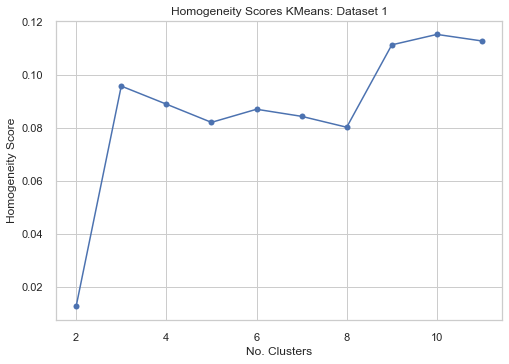

In [484]:
d1_km_times = run_kmeans(X1_train_scaled, y1_train,'Dataset 1');

dataset1 - EM

In [176]:
EM1 = EM(random_state=2021)

In [189]:
def run_EM(X,y,title):

    #kdist =  [2,3,4,5]
    #kdist = list(range(2,51))
    kdist = list(range(2,12))
    sil_scores = []; homo_scores = []; train_times = []; aic_scores = []; bic_scores = []
    ll_scores = []

    for k in kdist:
        start_time = timeit.default_timer()
        em = EM(n_components=k,warm_start=True,random_state=2021).fit(X)
        end_time = timeit.default_timer()
        train_times.append(end_time - start_time)

        labels = em.predict(X)
        sil_scores.append(silhouette_score(X, labels))
        homo_scores.append(homogeneity_score(y, labels))
        aic_scores.append(em.aic(X))
        bic_scores.append(em.bic(X))
        ll_scores.append(em.score(X))

    # elbow curve for silhouette score
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(kdist, sil_scores,'-o')
    plt.grid(True)
    plt.xlabel('No. Distributions')
    plt.ylabel('Avg Silhouette Score')
    plt.title('Elbow Plot for EM: '+ title)
    plt.show()

    # plot homogeneity scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(kdist, homo_scores, '-o')
    plt.grid(True)
    plt.xlabel('No. Distributions')
    plt.ylabel('Homogeneity Score')
    plt.title('Homogeneity Scores EM: '+ title)
    plt.show()

    # plot loglikelihood
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(kdist, ll_scores,'-o')
    plt.grid(True)
    plt.xlabel('No. Distributions')
    plt.ylabel('LogLikelihood')
    plt.title('LogLikelihood EM: '+ title)
    plt.show()
    plt.close()

    # plot model AIC and BIC
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(kdist, aic_scores,'-o', label='AIC')
    ax.plot(kdist, bic_scores,'-o',label='BIC')
    plt.grid(True)
    plt.xlabel('No. Distributions')
    plt.ylabel('Model Complexity Score')
    plt.title('EM Model Complexity: '+ title)
    plt.legend(loc="best")
    plt.show()
    plt.close()
    return train_times

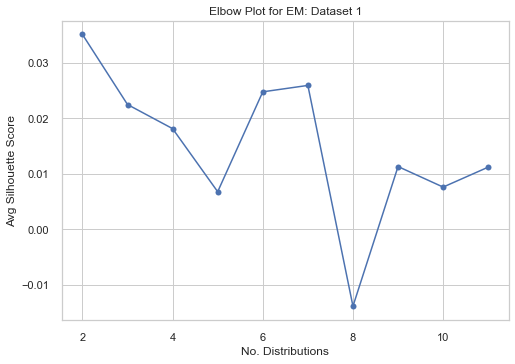

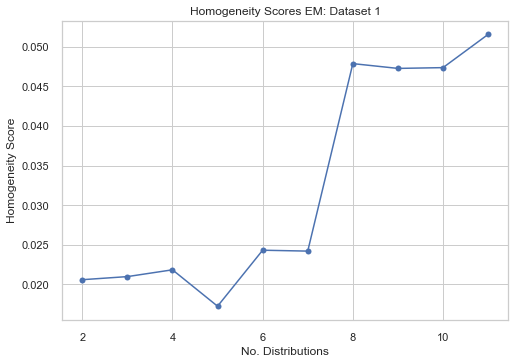

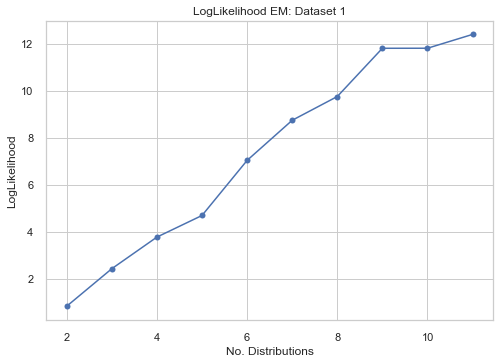

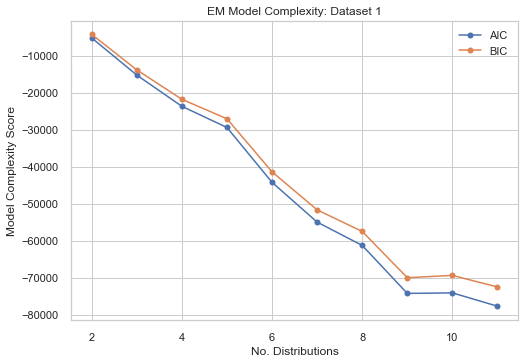

In [482]:
d1_em_times = run_EM(X1_train_scaled, y1_train,'Dataset 1');

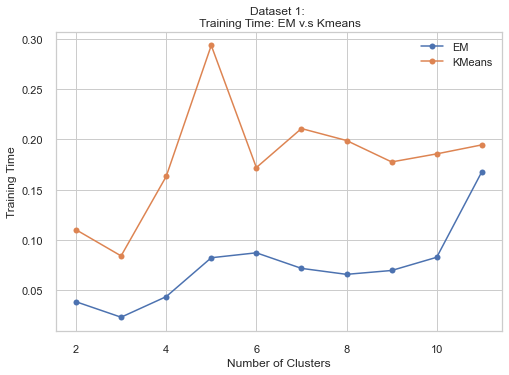

In [179]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(2,12),d1_em_times,'-o',label='EM')
ax.plot(range(2,12),d1_km_times,'-o',label='KMeans')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Training Time')
ax.legend(loc='best')
plt.grid(True)
plt.title('Dataset 1: \n Training Time: EM v.s Kmeans')
plt.show()

dataset2 - KMeans

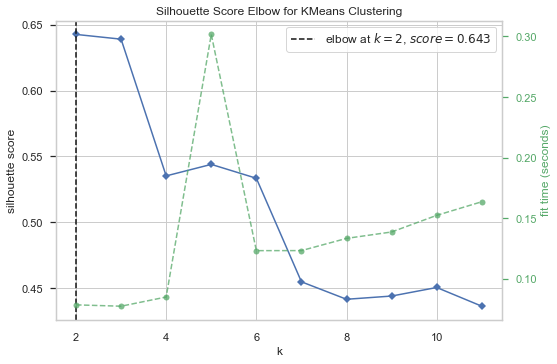

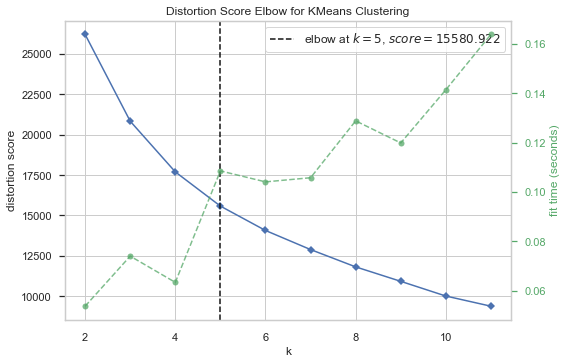

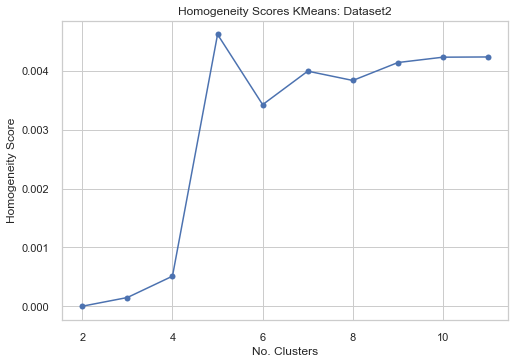

In [483]:
d2_km_times = run_kmeans(X2_train_scaled, y2_train, 'Dataset2')

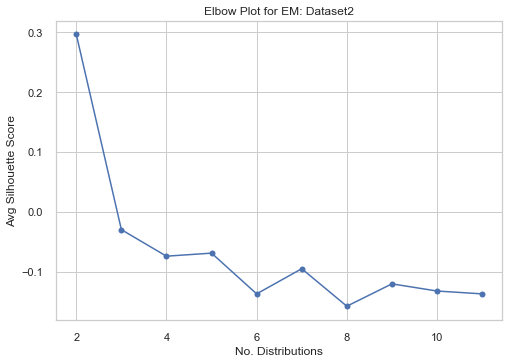

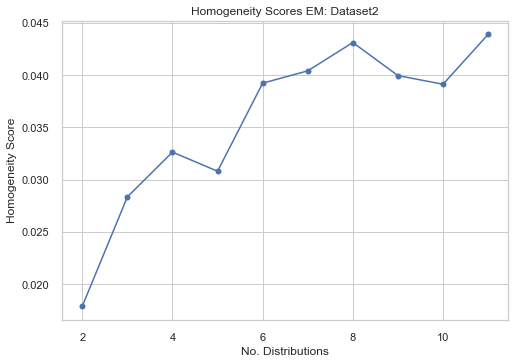

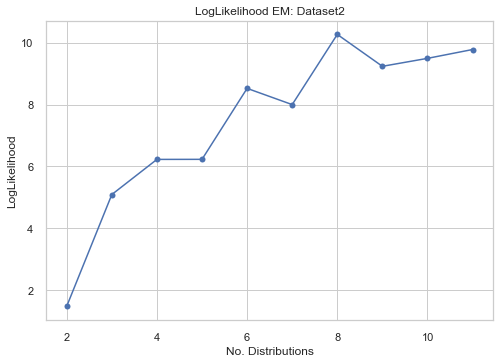

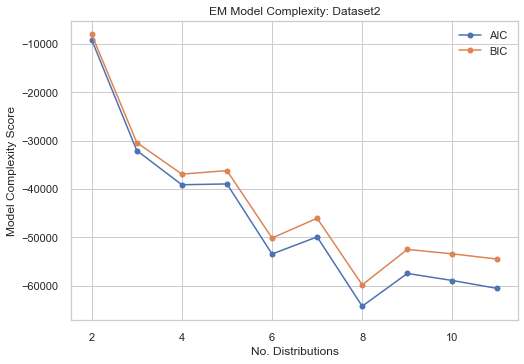

In [220]:
d2_em_times = run_EM(X2_train_scaled, y2_train, 'Dataset2')

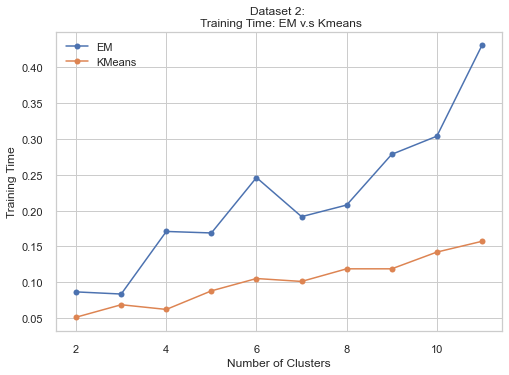

In [221]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(2,12),d2_em_times,'-o',label='EM')
ax.plot(range(2,12),d2_km_times,'-o',label='KMeans')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Training Time')
ax.legend(loc='best')
plt.grid(True)
plt.title('Dataset 2: \n Training Time: EM v.s Kmeans')
plt.show()



Dimensionality Reduction

In [195]:
from sklearn.decomposition import PCA, FastICA

In [317]:
def run_PCA(X,y,title, orig_data):

    pca = PCA(random_state=2021).fit(X) #for all components
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    top_idx = [np.argmax(abs(i)) for i in pca.components_]
    top_features = [orig_data.columns[i] for i in top_idx]


    fig, ax1 = plt.subplots()
    ax1.plot(list(range(1,len(pca.explained_variance_ratio_)+1)), cum_var, '-o')
    ax1.set_xlabel('Principal Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Cumulative Explained Variance Ratio', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(list(range(1,len(pca.singular_values_)+1)), pca.singular_values_, '-o',color = 'r')
    ax2.set_ylabel('Eigenvalues', color='r')
    ax2.tick_params('y', colors='r')
    plt.grid(False)


    plt.title("PCA Explained Variance and Eigenvalues: "+ title)
    fig.tight_layout()
    plt.show()

    return top_features

In [385]:
def run_ICA(X,y,title):

    dims = list(np.arange(2,(X.shape[1]-1),1))
    dims.append(X.shape[1])
    ica = FastICA(random_state=2021)
    kurt = []

    for dim in dims:
        ica.set_params(n_components=dim)
        tmp = ica.fit_transform(X)
        tmp = pd.DataFrame(tmp)
        tmp = tmp.kurt(axis=0)
        kurt.append(tmp.abs().mean())

    plt.figure()
    plt.title("ICA Kurtosis: "+ title)
    plt.xlabel("Independent Components")
    plt.ylabel("Avg Kurtosis Across IC")
    plt.plot(dims, kurt, 'o-')
    plt.grid(False)
    plt.show()

In [337]:
def pairwiseDistCorr(X1,X2):
    assert X1.shape[0] == X2.shape[0]

    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]
def run_RCA(X,y,title):

    dims = list(np.arange(2,(X.shape[1]-1),1))
    dims.append(X.shape[1])
    tmp = defaultdict(dict)

    for i,dim in product(range(5),dims):
        rp = RCA(random_state=i, n_components=dim)
        tmp[dim][i] = pairwiseDistCorr(rp.fit_transform(X), X)
    tmp = pd.DataFrame(tmp).T
    mean_recon = tmp.mean(axis=1).tolist()
    std_recon = tmp.std(axis=1).tolist()


    fig, ax1 = plt.subplots()
    ax1.plot(dims,mean_recon, 'o-')
    ax1.set_xlabel('Random Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Mean Reconstruction Correlation', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(dims,std_recon, 'o-',color = 'r')
    ax2.set_ylabel('STD Reconstruction Correlation', color='r')
    ax2.tick_params('y', colors='r')
    plt.grid(False)

    plt.title("Random Components for 5 Restarts: "+ title)
    fig.tight_layout()
    plt.show()

In [379]:
def run_RFC(X,y,df_original,title
            ):
    rfc = RFC(n_estimators=500,min_samples_leaf=round(len(X)*.01),random_state=2021)
    imp = rfc.fit(X,y).feature_importances_
    imp = pd.DataFrame(imp,columns=['Feature Importance'],index=df_original.columns)
    imp.sort_values(by=['Feature Importance'],inplace=True,ascending=False)
    imp['Cum Sum'] = imp['Feature Importance'].cumsum()
    imp = imp[imp['Cum Sum']<=0.95]
    top_cols = imp.index.tolist()

    features = df_original.columns
    importances = rfc.feature_importances_/rfc.feature_importances_.max()
    indices = np.argsort(importances)

    plt.title(title + ': Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    return imp, top_cols

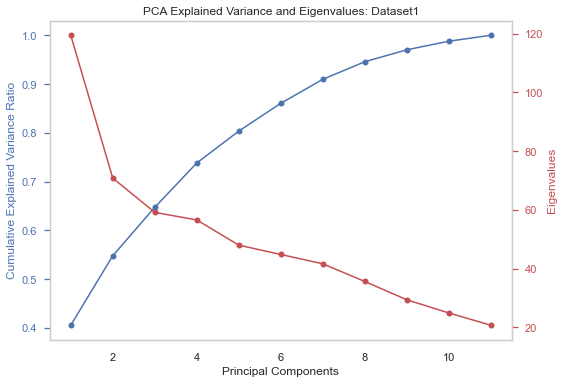

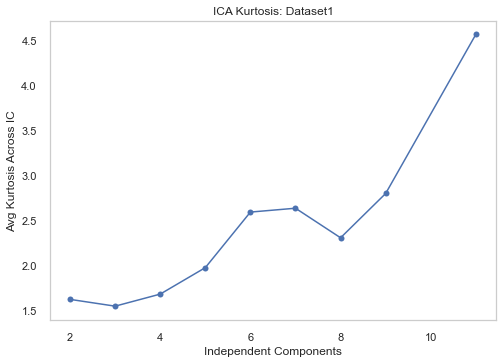

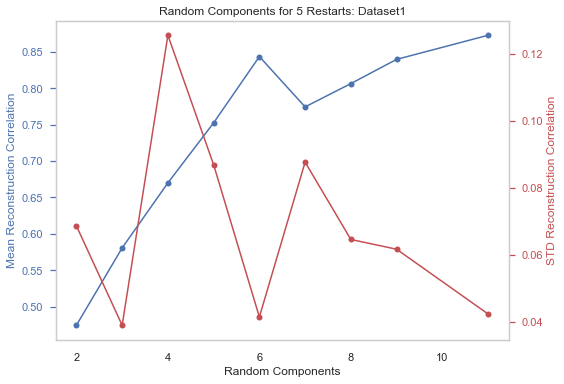

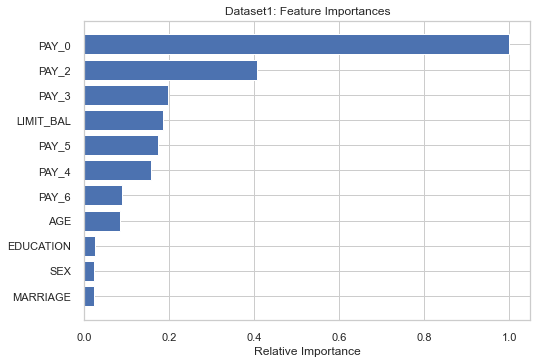

(           Feature Importance   Cum Sum
 PAY_0                0.422830  0.422830
 PAY_2                0.171506  0.594336
 PAY_3                0.083196  0.677532
 LIMIT_BAL            0.078744  0.756276
 PAY_5                0.073366  0.829642
 PAY_4                0.067054  0.896696
 PAY_6                0.038103  0.934798,
 ['PAY_0', 'PAY_2', 'PAY_3', 'LIMIT_BAL', 'PAY_5', 'PAY_4', 'PAY_6'])

In [387]:
run_PCA(X1_train_scaled, y1_train, 'Dataset1',data_dict['X1_train'])
run_ICA(X1_train_scaled, y1_train, 'Dataset1')
run_RCA(X1_train_scaled, y1_train, 'Dataset1')
run_RFC(X1_train_scaled, y1_train, data_dict['X1_train'],'Dataset1')

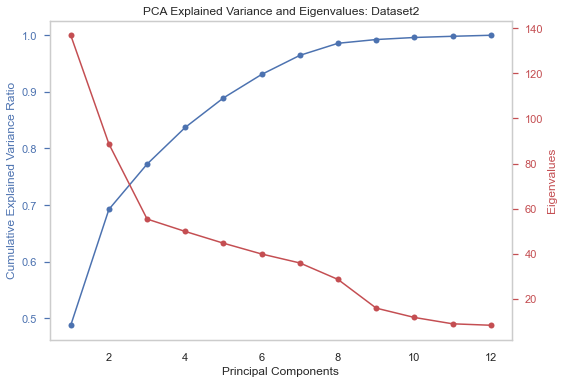

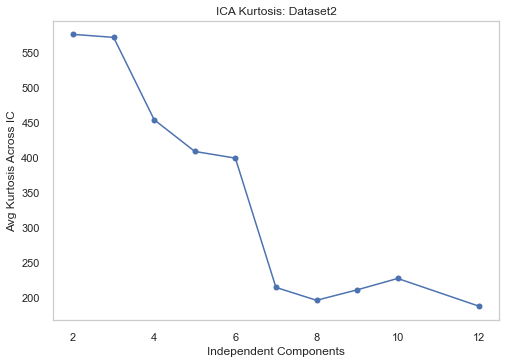

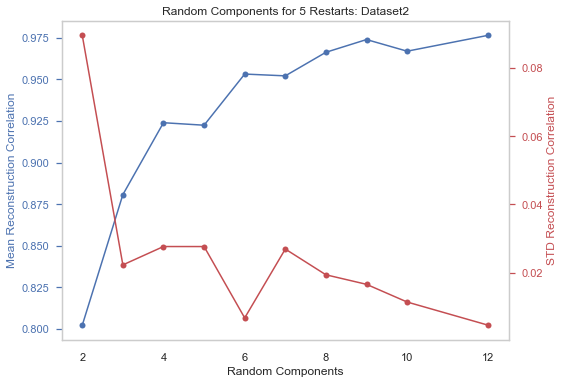

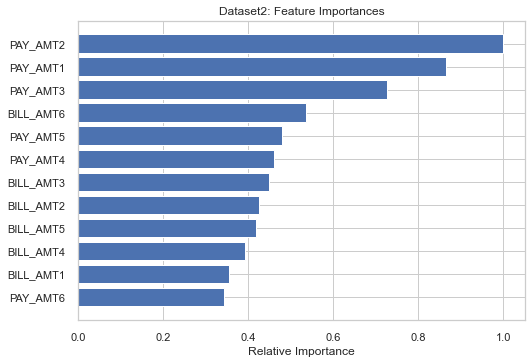

(           Feature Importance   Cum Sum
 PAY_AMT2             0.155180  0.155180
 PAY_AMT1             0.134147  0.289327
 PAY_AMT3             0.112529  0.401855
 BILL_AMT6            0.082985  0.484841
 PAY_AMT5             0.074333  0.559174
 PAY_AMT4             0.071291  0.630465
 BILL_AMT3            0.069657  0.700122
 BILL_AMT2            0.065997  0.766120
 BILL_AMT5            0.064752  0.830871
 BILL_AMT4            0.060999  0.891870
 BILL_AMT1            0.055075  0.946945,
 ['PAY_AMT2',
  'PAY_AMT1',
  'PAY_AMT3',
  'BILL_AMT6',
  'PAY_AMT5',
  'PAY_AMT4',
  'BILL_AMT3',
  'BILL_AMT2',
  'BILL_AMT5',
  'BILL_AMT4',
  'BILL_AMT1'])

In [386]:
run_PCA(X2_train_scaled, y2_train, 'Dataset2',data_dict['X2_train'])
run_ICA(X2_train_scaled, y2_train, 'Dataset2')
run_RCA(X2_train_scaled, y2_train, 'Dataset2')
run_RFC(X2_train_scaled, y2_train, data_dict['X2_train'],'Dataset2')

Part 3 - Apply reduced features to clustering algorithm

Dataset1
- PCA: 7 components explains over 90% of variance
- ICA: The averaged kurtosis arrives the peak at 6 components
- RCA: 6 components
- RandomForest Classifier: pick the top 6 features with relative importance > 0.1

In [485]:
X1_PCAed = PCA(n_components=7,random_state=2021).fit_transform(X1_train_scaled)
X1_ICAed = FastICA(n_components=6,random_state=2021).fit_transform(X1_train_scaled)
X1_RCAed = RCA(n_components=6,random_state=2021).fit_transform(X1_train_scaled)
X1_RFCed = X1_train_scaled[:,[0,5,6,7,8,9]]

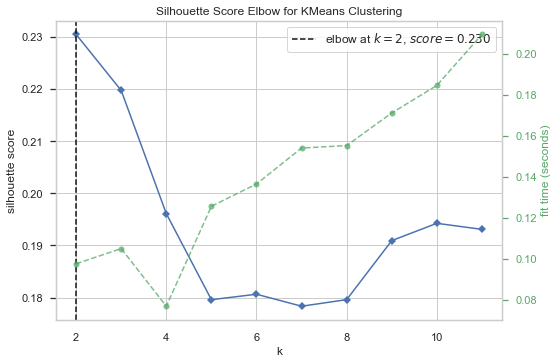

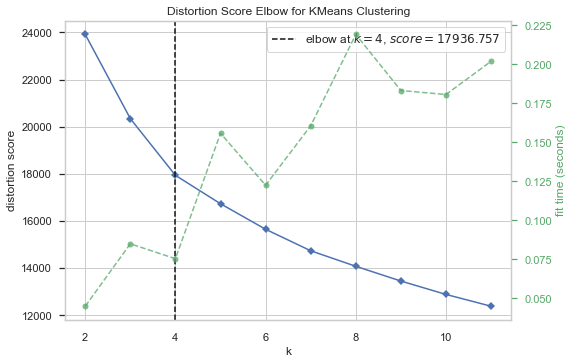

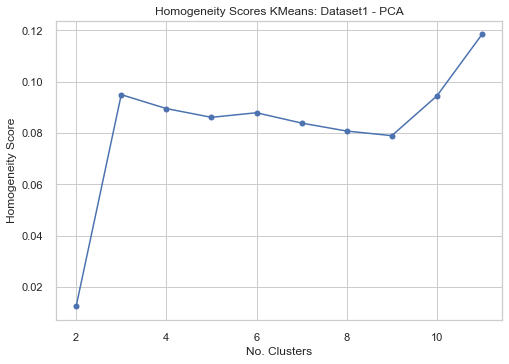

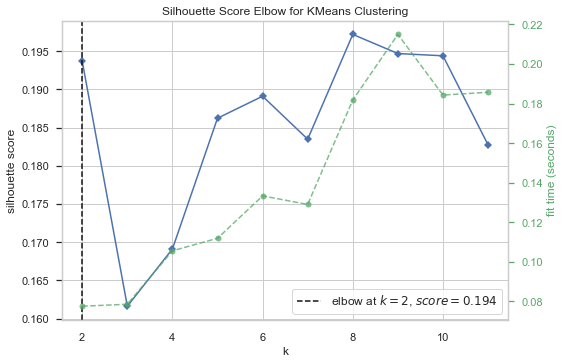

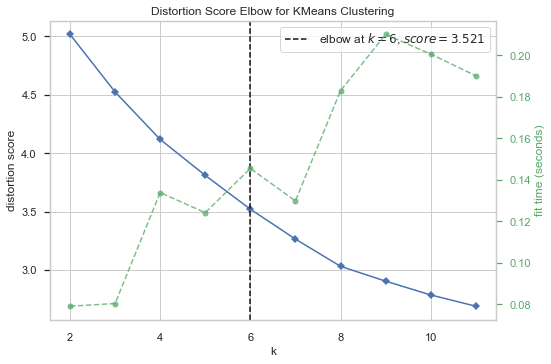

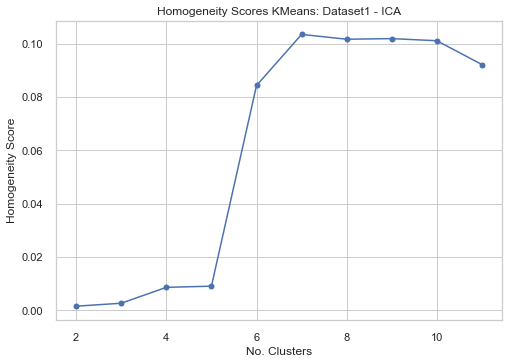

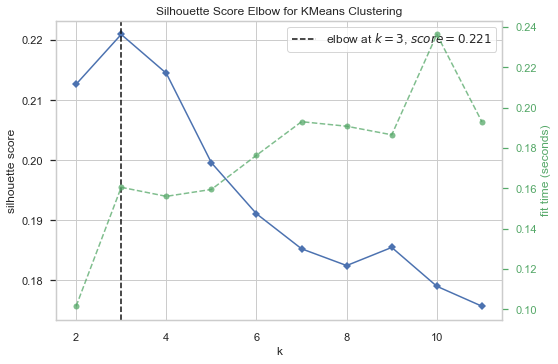

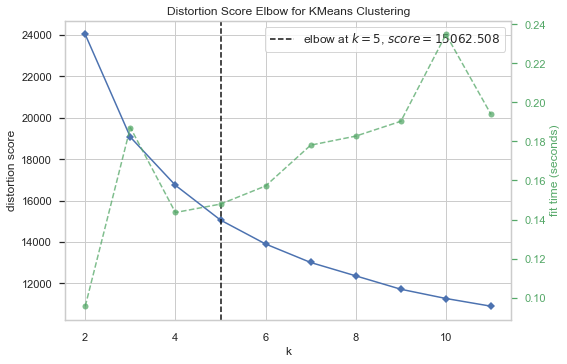

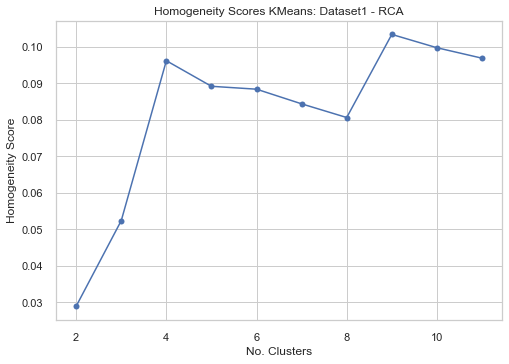

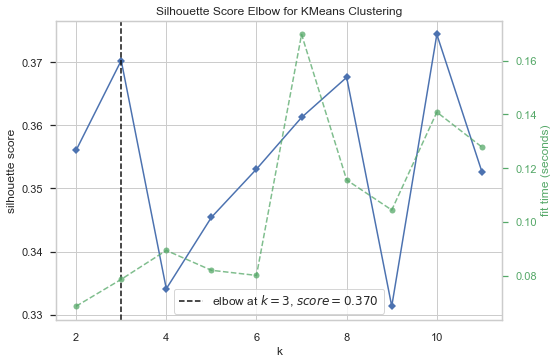

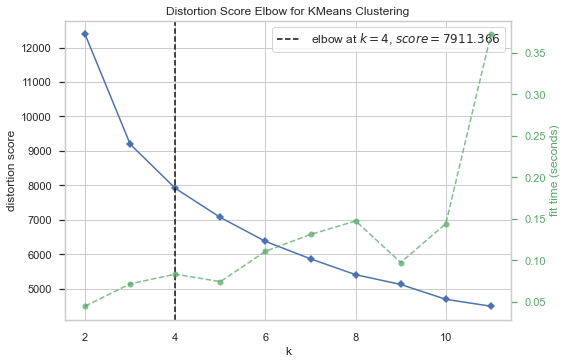

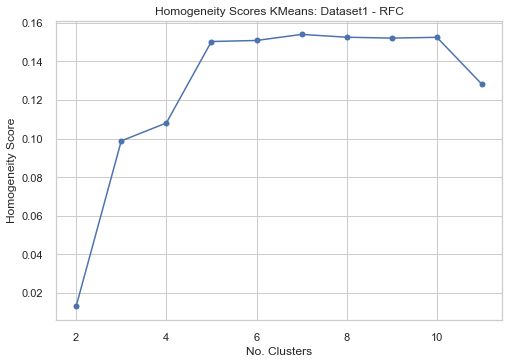

In [486]:
X1_red_times = []
X1_red_times.append(run_kmeans(X1_PCAed, y1_train, 'Dataset1 - PCA'))
X1_red_times.append(run_kmeans(X1_ICAed, y1_train, 'Dataset1 - ICA'))
X1_red_times.append(run_kmeans(X1_RCAed, y1_train, 'Dataset1 - RCA'))
X1_red_times.append(run_kmeans(X1_RFCed, y1_train, 'Dataset1 - RFC'))

Text(0, 0.5, 'Training Time')

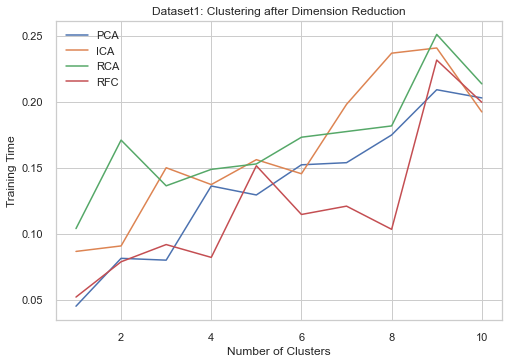

In [487]:
km_times = pd.DataFrame(X1_red_times).transpose()
km_times.columns = ['PCA','ICA','RCA','RFC']
km_times.index = range(1,11)
km_times.plot()
plt.title('Dataset1: Clustering after Dimension Reduction')
plt.xlabel('Number of Clusters')
plt.ylabel('Training Time')

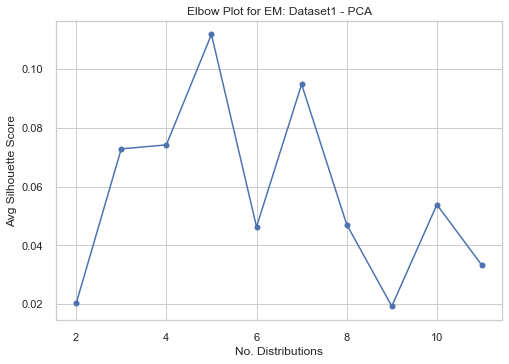

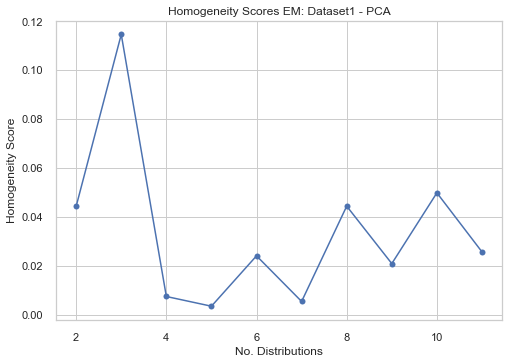

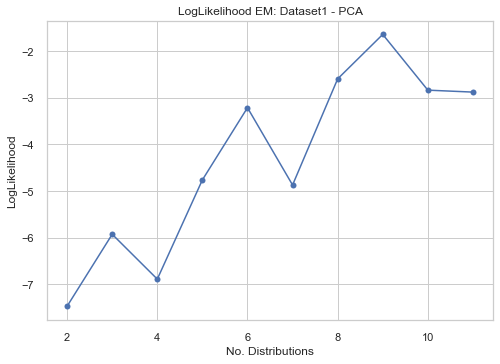

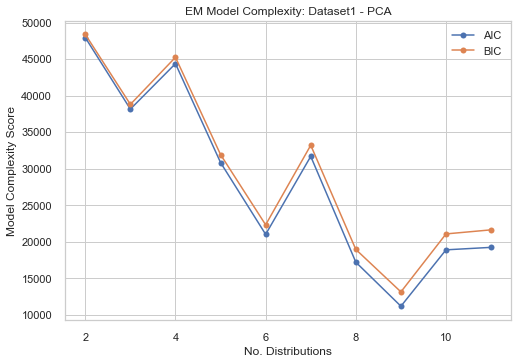

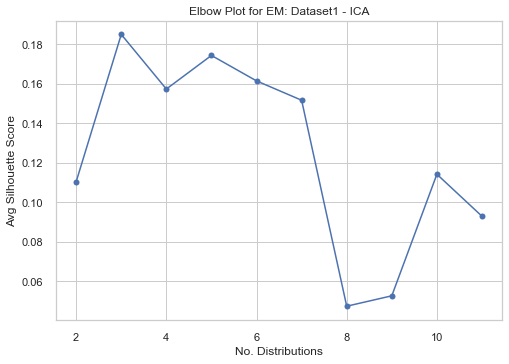

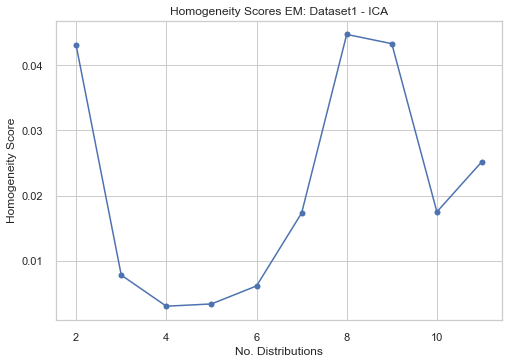

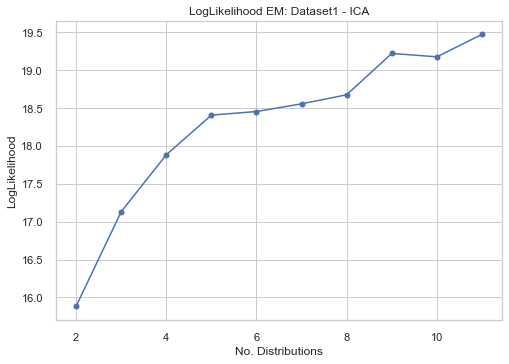

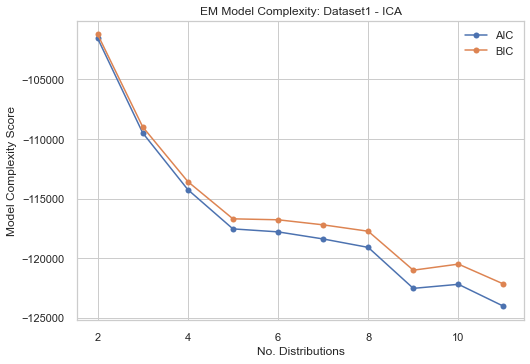

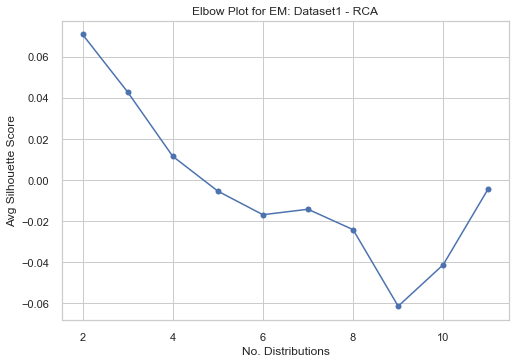

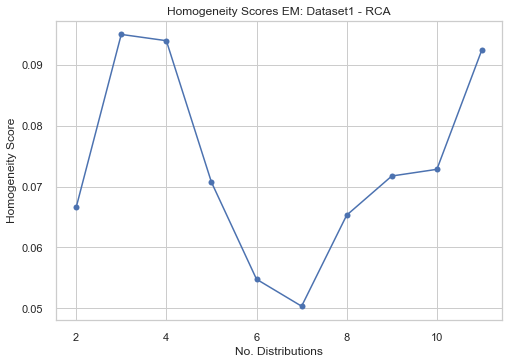

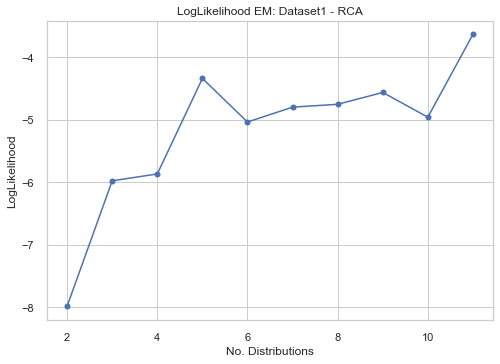

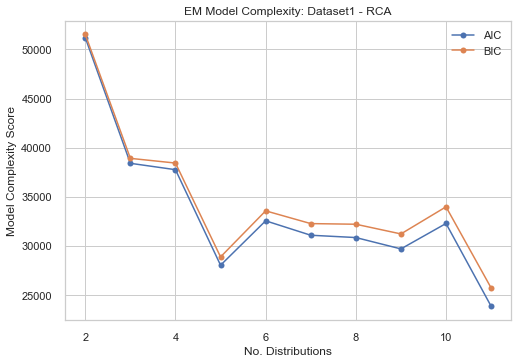

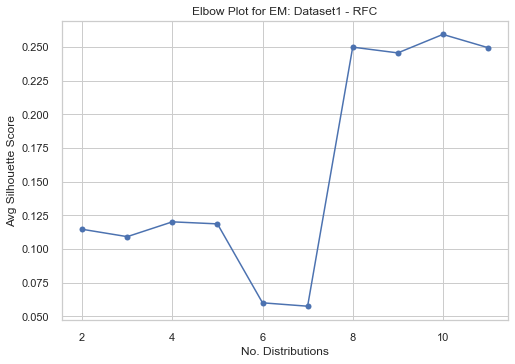

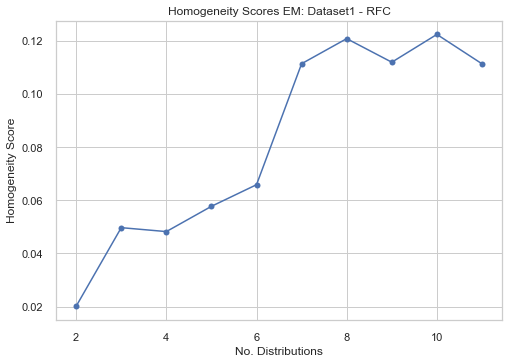

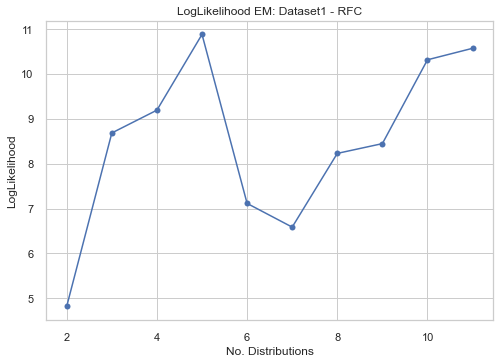

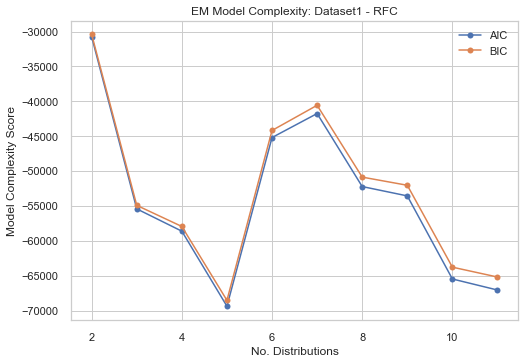

In [488]:
X1_red_times_em = []
X1_red_times_em.append(run_EM(X1_PCAed, y1_train, 'Dataset1 - PCA'))
X1_red_times_em.append(run_EM(X1_ICAed, y1_train, 'Dataset1 - ICA'))
X1_red_times_em.append(run_EM(X1_RCAed, y1_train, 'Dataset1 - RCA'))
X1_red_times_em.append(run_EM(X1_RFCed, y1_train, 'Dataset1 - RFC'))

Text(0, 0.5, 'Training Time')

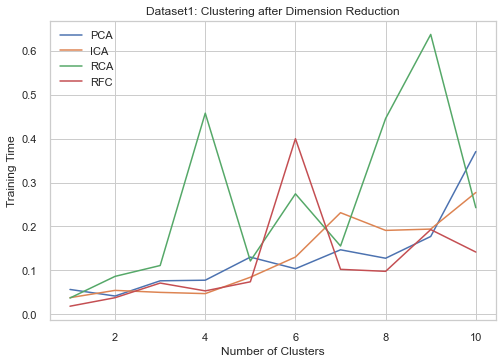

In [489]:
em_times = pd.DataFrame(X1_red_times_em).transpose()
em_times.columns = ['PCA','ICA','RCA','RFC']
em_times.index = range(1,11)
em_times.plot()
plt.title('Dataset1: Clustering after Dimension Reduction')
plt.xlabel('Number of Clusters')
plt.ylabel('Training Time')

Build datasets for task 4 and task 5
Number of clusters:
- KMeans (PCA - 4, ICA - 6, RCA - 4, RCF - 5)
- EM (PCA - 8 , ICA - 8, RCA - 5, RCF - 5)

In [521]:
km = KMeans(random_state=2021, n_clusters=4)
km.fit_transform(X1_PCAed)
X1_PCA_clusters = pd.DataFrame(X1_PCAed)
X1_PCA_clusters.columns = ['var'+str(i) for i in range(1,8)]
X1_PCA_clusters['Kmeans_cluster'] = km.labels_
em = EM(n_components=8,warm_start=True,random_state=2021)
X1_PCA_clusters['EM_cluster'] = em.fit_predict(X1_PCAed)
X1_PCA_clusters.columns.tolist()

['var1',
 'var2',
 'var3',
 'var4',
 'var5',
 'var6',
 'var7',
 'Kmeans_cluster',
 'EM_cluster']

In [522]:
km = KMeans(random_state=2021, n_clusters=6)
km.fit_transform(X1_ICAed)
X1_ICA_clusters = pd.DataFrame(X1_ICAed)
X1_ICA_clusters.columns = ['var'+str(i) for i in range(1,X1_ICAed.shape[1]+1)]
X1_ICA_clusters['Kmeans_cluster'] = km.labels_
em = EM(n_components=8,warm_start=True,random_state=2021)
X1_ICA_clusters['EM_cluster'] = em.fit_predict(X1_ICAed)
X1_ICA_clusters.columns.tolist()

['var1',
 'var2',
 'var3',
 'var4',
 'var5',
 'var6',
 'Kmeans_cluster',
 'EM_cluster']

In [523]:
km = KMeans(random_state=2021, n_clusters=4)
km.fit_transform(X1_RCAed)
X1_RCA_clusters = pd.DataFrame(X1_RCAed)
X1_RCA_clusters.columns = ['var'+str(i) for i in range(1,X1_RCAed.shape[1]+1)]
X1_RCA_clusters['Kmeans_cluster'] = km.labels_
em = EM(n_components=5,warm_start=True,random_state=2021)
X1_RCA_clusters['EM_cluster'] = em.fit_predict(X1_RCAed)
X1_RCA_clusters.columns.tolist()

['var1',
 'var2',
 'var3',
 'var4',
 'var5',
 'var6',
 'Kmeans_cluster',
 'EM_cluster']

In [524]:
km = KMeans(random_state=2021, n_clusters=5)
km.fit_transform(X1_RFCed)
X1_RFC_clusters = pd.DataFrame(X1_RFCed)
X1_RFC_clusters.columns = ['var'+str(i) for i in range(1,X1_RFCed.shape[1]+1)]
X1_RFC_clusters['Kmeans_cluster'] = km.labels_
em = EM(n_components=5,warm_start=True,random_state=2021)
X1_RFC_clusters['EM_cluster'] = em.fit_predict(X1_RCAed)
X1_RFC_clusters.columns.tolist()

['var1',
 'var2',
 'var3',
 'var4',
 'var5',
 'var6',
 'Kmeans_cluster',
 'EM_cluster']

In [525]:
X1_PCA_clusters.to_csv('X1_PCA_clusters.csv',index=False)
X1_ICA_clusters.to_csv('X1_ICA_clusters.csv',index=False)
X1_RCA_clusters.to_csv('X1_RCA_clusters.csv',index=False)
X1_RFC_clusters.to_csv('X1_RFC_clusters.csv',index=False)


Dataset2
- PCA: 6 components explains over 90% of variance
- ICA: The averaged kurtosis arrives the peak at 2 components
- RCA: 4 components
- RandomForest Classifier: pick the top 4 features with relative importance > 0.1

In [495]:
X2_PCAed = PCA(n_components=6,random_state=2021).fit_transform(X2_train_scaled)
X2_ICAed = FastICA(n_components=2,random_state=2021).fit_transform(X2_train_scaled)
X2_RCAed = RCA(n_components=4,random_state=2021).fit_transform(X2_train_scaled)
X2_RFCed = X2_train_scaled[:,[2,5,6,7,8,9,10,]]

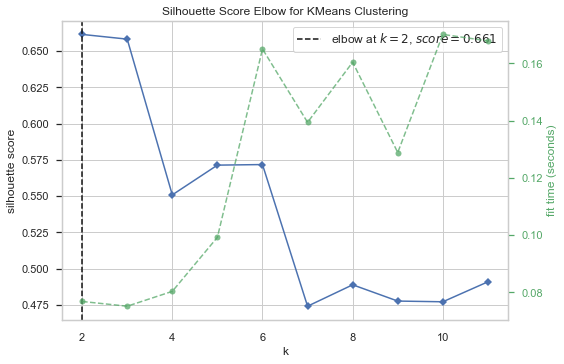

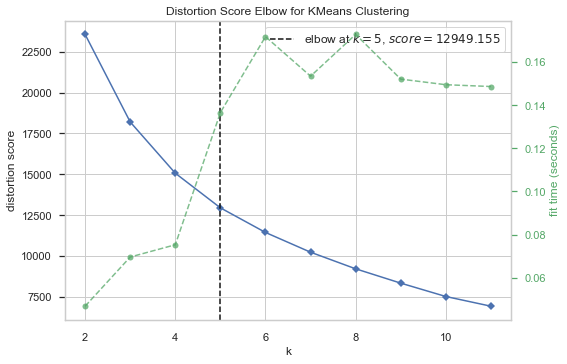

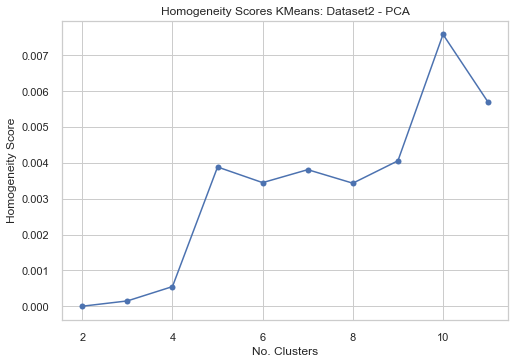

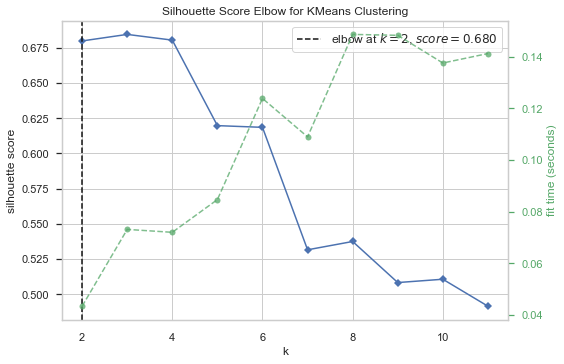

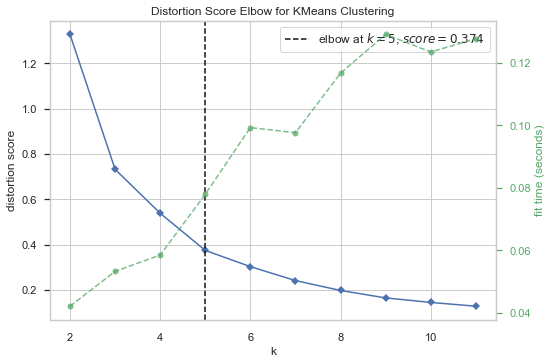

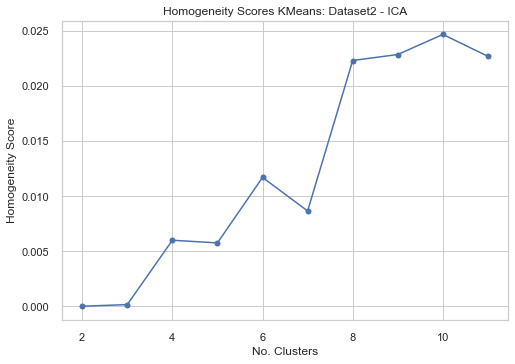

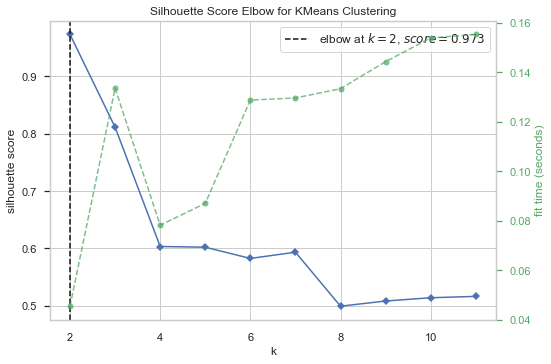

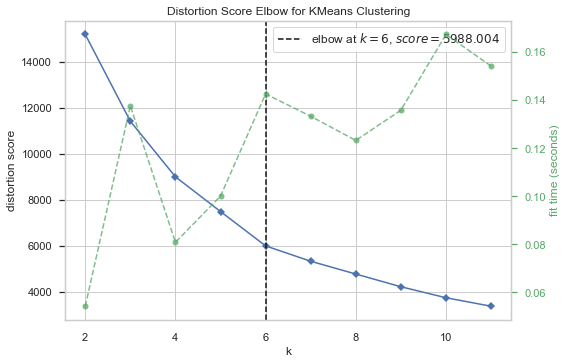

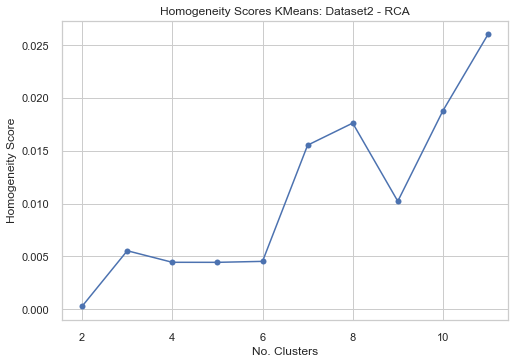

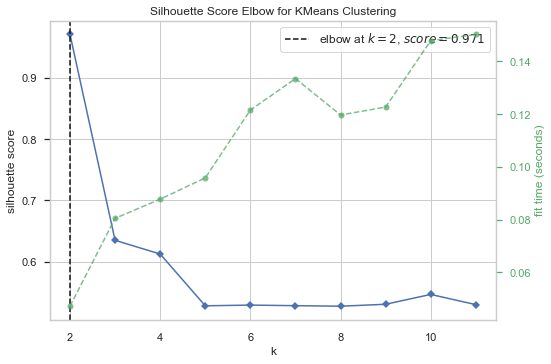

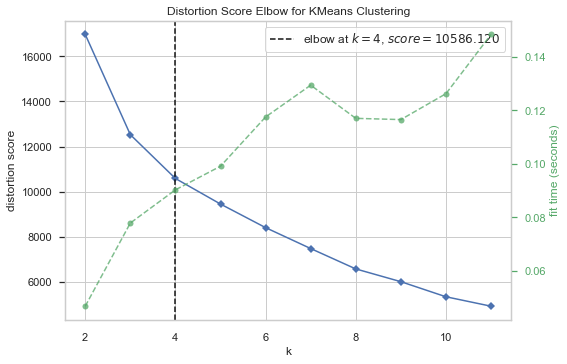

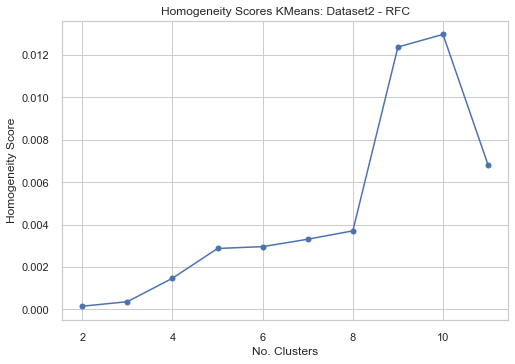

In [496]:
X2_red_times = []
X2_red_times.append(run_kmeans(X2_PCAed, y2_train, 'Dataset2 - PCA'))
X2_red_times.append(run_kmeans(X2_ICAed, y2_train, 'Dataset2 - ICA'))
X2_red_times.append(run_kmeans(X2_RCAed, y2_train, 'Dataset2 - RCA'))
X2_red_times.append(run_kmeans(X2_RFCed, y2_train, 'Dataset2 - RFC'))

Text(0, 0.5, 'Training Time')

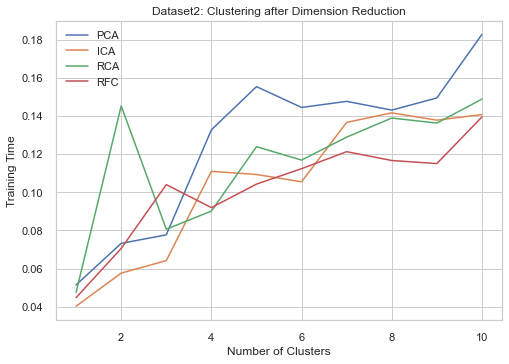

In [497]:
km_times = pd.DataFrame(X2_red_times).transpose()
km_times.columns = ['PCA','ICA','RCA','RFC']
km_times.index = range(1,11)
km_times.plot()
plt.title('Dataset2: Clustering after Dimension Reduction')
plt.xlabel('Number of Clusters')
plt.ylabel('Training Time')

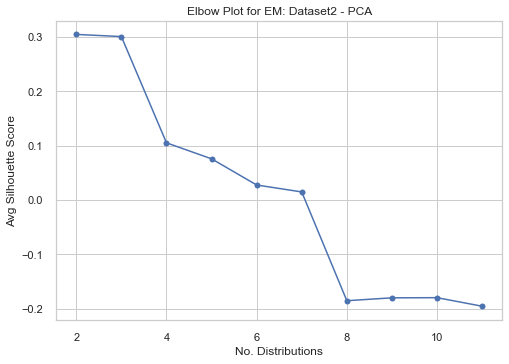

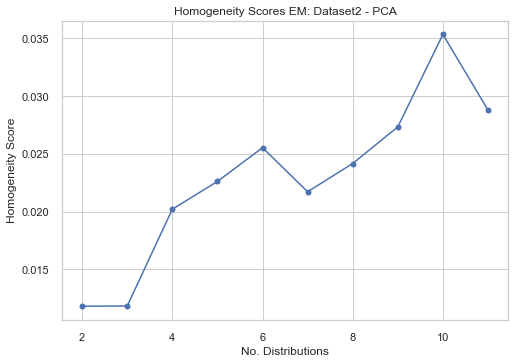

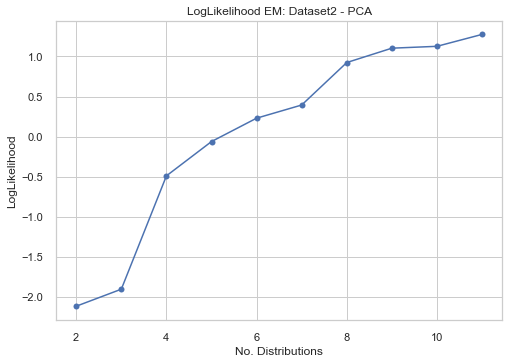

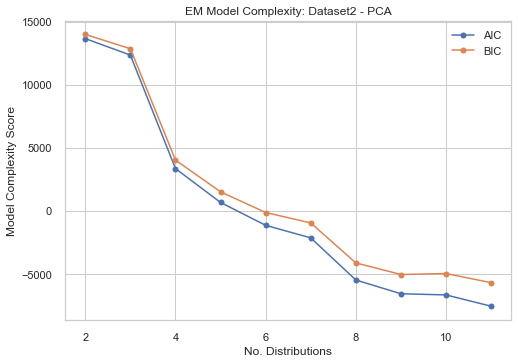

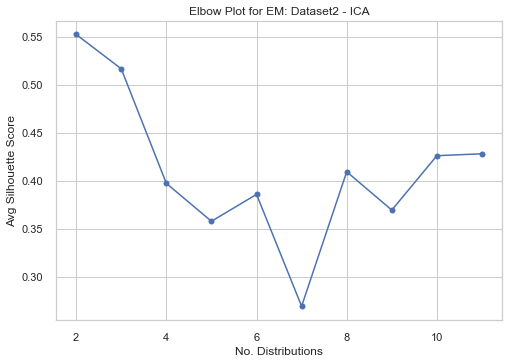

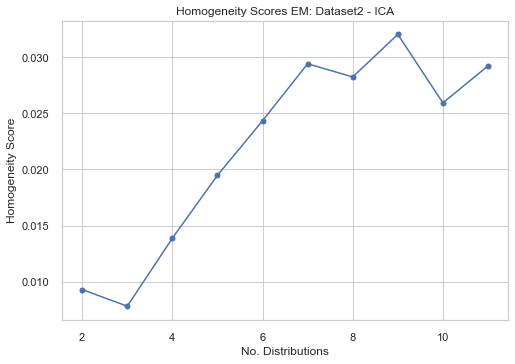

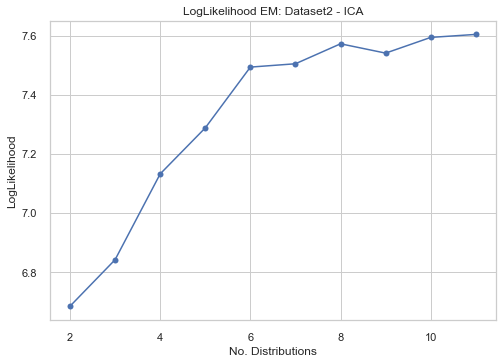

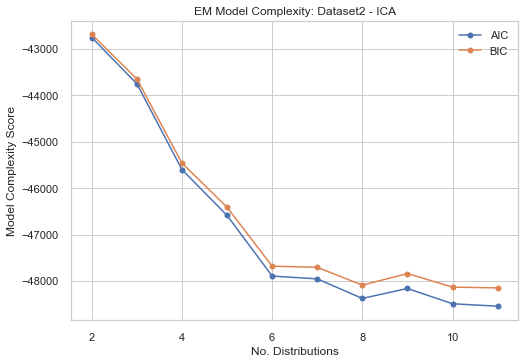

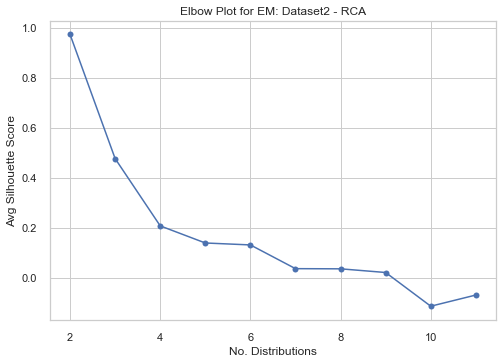

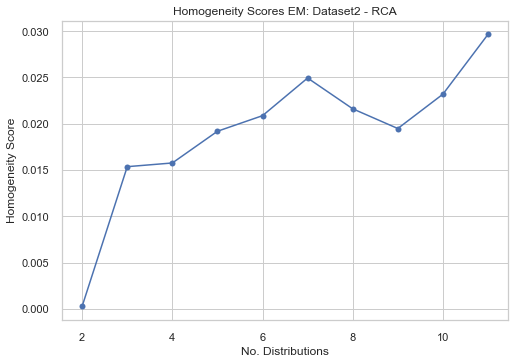

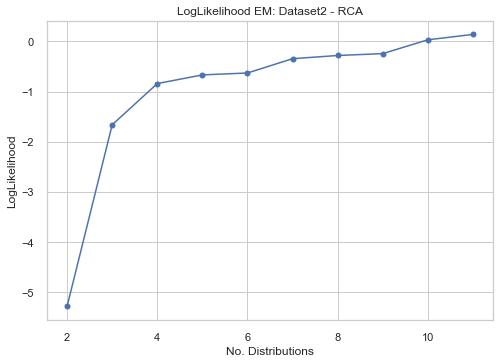

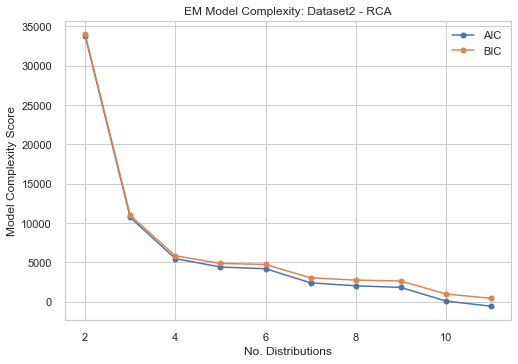

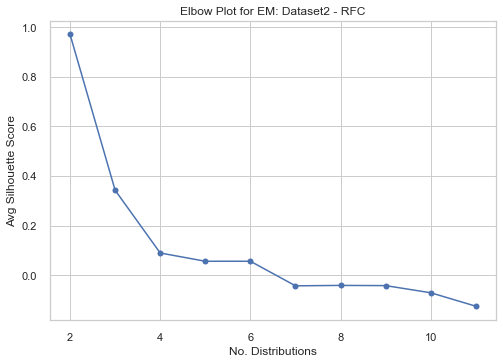

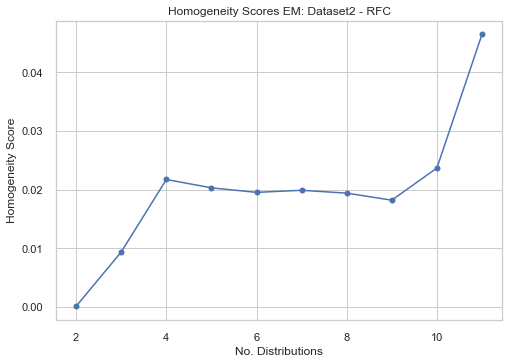

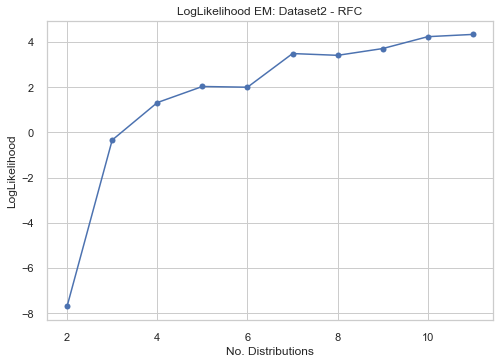

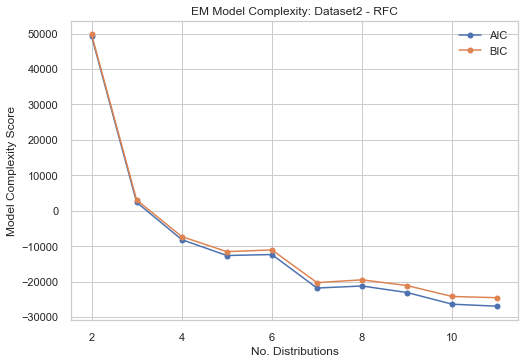

In [498]:
X2_red_times_em = []
X2_red_times_em.append(run_EM(X2_PCAed, y2_train, 'Dataset2 - PCA'))
X2_red_times_em.append(run_EM(X2_ICAed, y2_train, 'Dataset2 - ICA'))
X2_red_times_em.append(run_EM(X2_RCAed, y2_train, 'Dataset2 - RCA'))
X2_red_times_em.append(run_EM(X2_RFCed, y2_train, 'Dataset2 - RFC'))

Text(0, 0.5, 'Training Time')

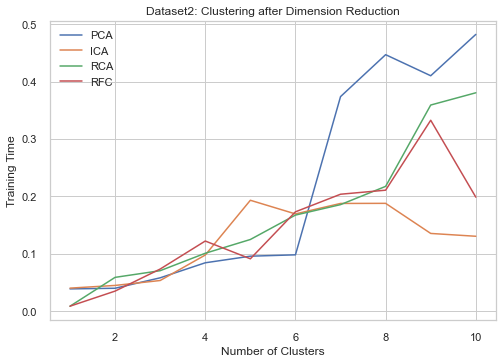

In [499]:
em_times = pd.DataFrame(X2_red_times_em).transpose()
em_times.columns = ['PCA','ICA','RCA','RFC']
em_times.index = range(1,11)
em_times.plot()
plt.title('Dataset2: Clustering after Dimension Reduction')
plt.xlabel('Number of Clusters')
plt.ylabel('Training Time')